In [60]:
# 准备类别不平衡数据
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter # 计算出现的数量

# 随机过采样
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE, SMOTEN, SMOTENC, SVMSMOTE, BorderlineSMOTE, KMeansSMOTE, # SMOTE过采样
    ADASYN,
)

# 随机欠采样
from imblearn.under_sampling import (
    ClusterCentroids,
    AllKNN,
    CondensedNearestNeighbour,
    EditedNearestNeighbours,
    InstanceHardnessThreshold,
    NearMiss,
    NeighbourhoodCleaningRule,
    OneSidedSelection,
    RandomUnderSampler,
    RepeatedEditedNearestNeighbours,
    TomekLinks,
)

# 准备类别不平衡数据 make_classification
- n_samples:            样本数
- n_features:           特征数 = n_informative + n_redundant + n_repeated
- n_informative:        多信息特征的个数
- n_redundant:          冗余信息,informative特征的随机线性组合
- n_repeated:           重复信息,随机提取n_informative和n_redundant特征
- n_class:              分类类别
- n_clusters_per_class: 某一个类别是由几个cluster组成的
- weights:              n_class权重比
- random_state:         随机数种子

In [3]:
x, y = make_classification(n_samples=5000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           random_state=0)
x.shape, y.shape

((5000, 2), (5000,))

## 计算各类别总数

In [4]:
Counter(y)
# 5000 * 0.94 = 4700
# 5000 * 0.05 = 250
# 5000 * 0.01 = 50

Counter({2: 4674, 1: 262, 0: 64})

## 绘图

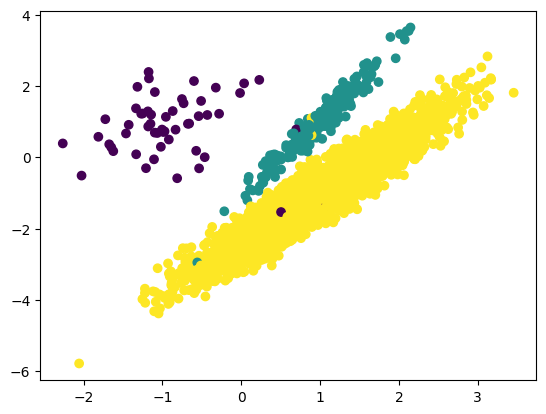

In [6]:
# x[:, 0] 所有行,第0列
# c=y 基于y分成不同类别
plt.scatter(x[:, 0], x[:, 1], c=y)

# 处理不平衡数据

## 过采样
增加数量较少的哪一类样本的数量,使得正负样本比例均衡


### 随机过采样 RandomOverSampler

In [7]:
ros = RandomOverSampler()

In [8]:
x_random_over , y_random_over = ros.fit_resample(x, y)

In [9]:
Counter(y_random_over)
# 数据量相等了

Counter({2: 4674, 1: 4674, 0: 4674})

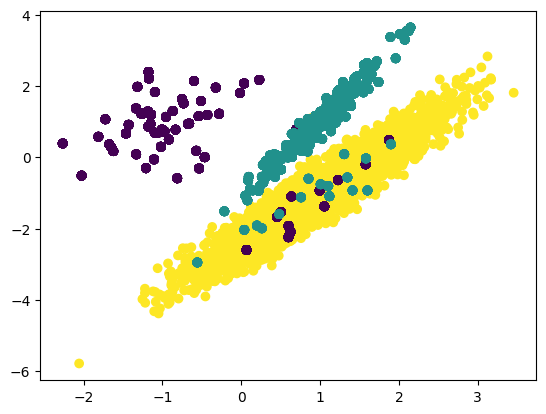

In [11]:
plt.scatter(x_random_over[:, 0], x_random_over[:, 1], c=y_random_over)

### SMOTE算法
#### SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
Counter(y_smote)

Counter({2: 4674, 1: 4674, 0: 4674})

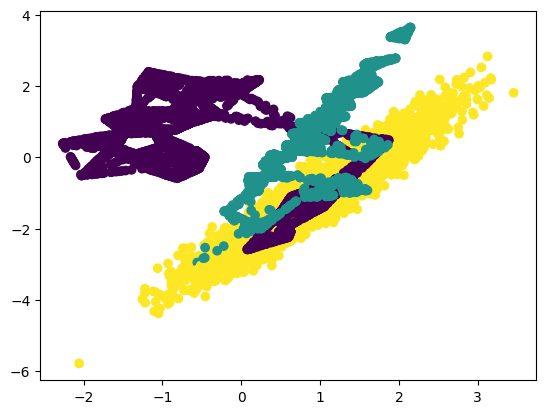

In [ ]:
plt.scatter(x_smote[:, 0], x_smote[:, 1], c=y_smote)

#### SMOTEN

In [20]:
smoten = SMOTEN()

In [21]:
x_smoten, y_smoten = smoten.fit_resample(x, y)

In [22]:
Counter(y_smoten)

Counter({2: 4674, 1: 4674, 0: 4674})

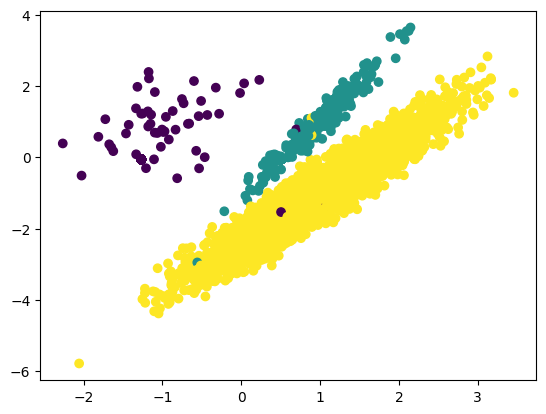

In [23]:
plt.scatter(x_smoten[:, 0], x_smoten[:, 1], c=y_smoten)

#### SMOTENC

In [46]:
smotenc = SMOTENC()

TypeError: __init__() missing 1 required positional argument: 'categorical_features'

In [ ]:
x_smotenc, y_smotenc = smotenc.fit_resample(x, y)

In [ ]:
Counter(y_smotenc)

Counter({2: 4674, 1: 4674, 0: 4674})

In [ ]:
plt.scatter(x_smotenc[:, 0], x_smotenc[:, 1], c=y_smotenc)

#### SVMSMOTE

In [27]:
svmsmote = SVMSMOTE()

In [28]:
x_svmsmote, y_svmsmote = svmsmote.fit_resample(x, y)

In [30]:
Counter(y_svmsmote)

Counter({2: 4674, 1: 4674, 0: 4674})

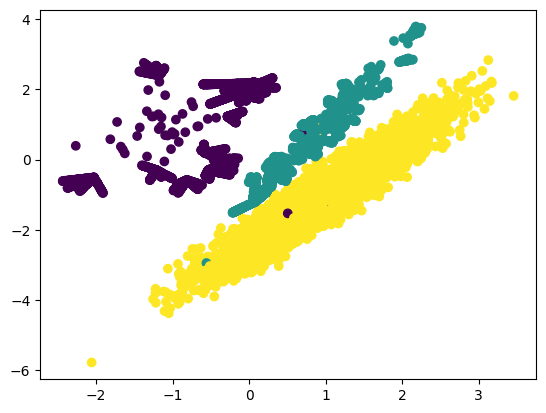

In [31]:
plt.scatter(x_svmsmote[:, 0], x_svmsmote[:, 1], c=y_svmsmote)

#### BorderlineSMOTE

In [56]:
bls = BorderlineSMOTE()

In [57]:
x_bls, y_bls = bls.fit_resample(x, y)

In [58]:
Counter(y_bls)

Counter({2: 4674, 1: 4674, 0: 4674})

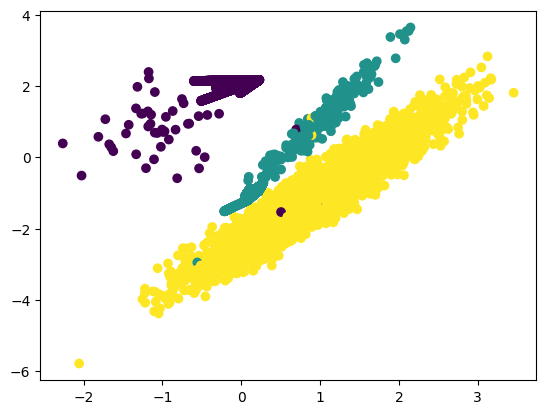

In [59]:
plt.scatter(x_bls[:, 0], x_bls[:, 1], c=y_bls)

#### KMeansSMOTE

In [41]:
kmeanssmote = KMeansSMOTE()

In [42]:
x_kmeanssmote, y_kmeanssmote = kmeanssmote.fit_resample(x, y)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RuntimeError: No clusters found with sufficient samples of class 0. Try lowering the cluster_balance_threshold or increasing the number of clusters.

In [ ]:
Counter(y_kmeanssmote)

In [ ]:
plt.scatter(x_kmeanssmote[:, 0], x_kmeanssmote[:, 1], c=y_kmeanssmote)

### ADASYN 算法

In [48]:
adasyn = ADASYN()

In [49]:
x_adasyn, y_adasyn = adasyn.fit_resample(x, y)

In [50]:
Counter(y_adasyn)

Counter({2: 4674, 1: 4659, 0: 4679})

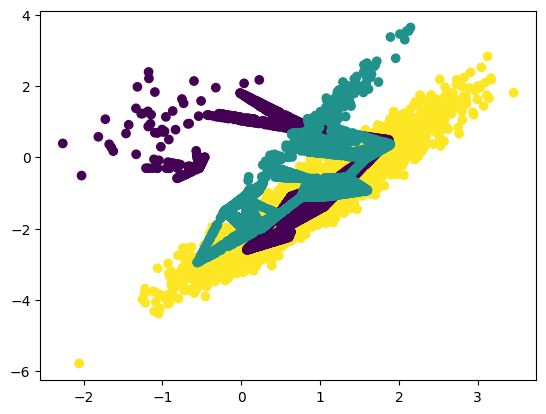

In [51]:
plt.scatter(x_adasyn[:, 0], x_adasyn[:, 1], c=y_adasyn)

## 欠采样

### 随机欠采样 RandomUnderSampler

In [52]:
rus = RandomUnderSampler()

In [53]:
x_rus, y_rus = rus.fit_resample(x, y)

In [54]:
Counter(y_rus)
# 数据减少了

Counter({0: 64, 1: 64, 2: 64})

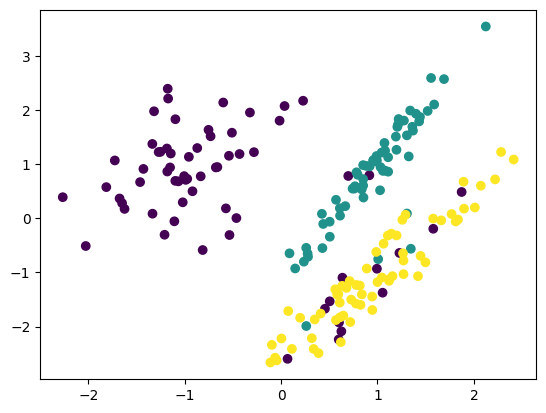

In [55]:
plt.scatter(x_rus[:, 0], x_rus[:, 1], c=y_rus)

### ClusterCentroids

In [66]:
cc = ClusterCentroids()

In [67]:
x_cc, y_cc = cc.fit_resample(x, y)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
Counter(y_cc)

Counter({0: 64, 1: 64, 2: 64})

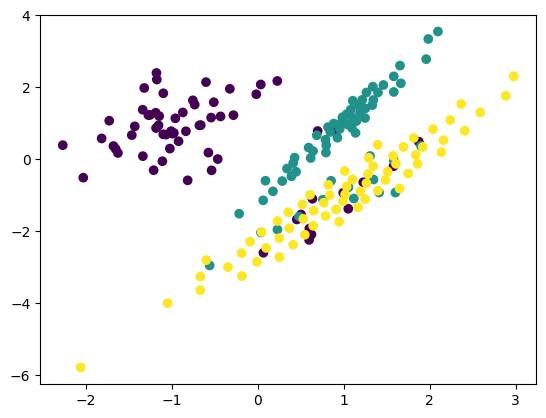

In [69]:
plt.scatter(x_cc[:, 0], x_cc[:, 1], c=y_cc)

### AllKNN

In [70]:
ak = AllKNN()

In [71]:
x_ak, y_ak = ak.fit_resample(x, y)

In [72]:
Counter(y_ak)

Counter({0: 64, 1: 237, 2: 4610})

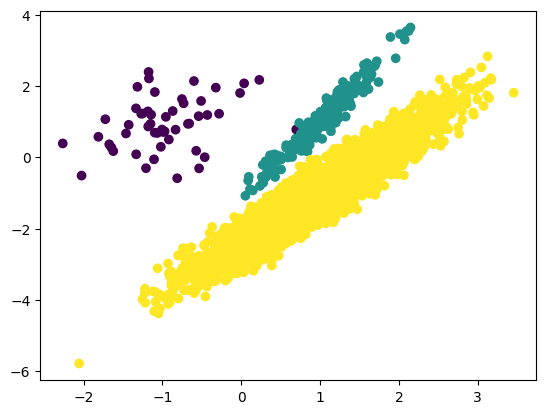

In [73]:
plt.scatter(x_ak[:, 0], x_ak[:, 1], c=y_ak)

### CondensedNearestNeighbour

In [75]:
cnn = CondensedNearestNeighbour()

In [76]:
x_cnn, y_cnn = cnn.fit_resample(x, y)

In [77]:
Counter(y_cnn)

Counter({0: 64, 1: 24, 2: 111})

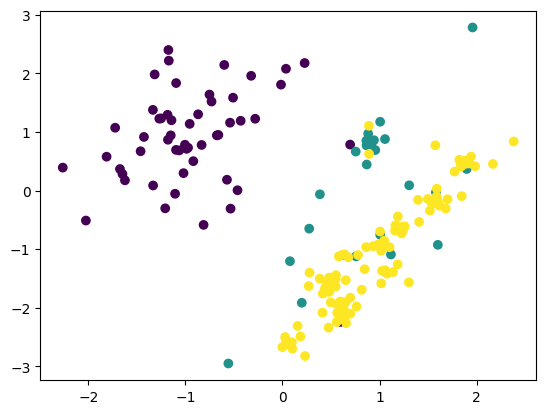

In [78]:
plt.scatter(x_cnn[:, 0], x_cnn[:, 1], c=y_cnn)

### EditedNearestNeighbours

In [79]:
enn = EditedNearestNeighbours()

In [80]:
x_enn, y_enn = enn.fit_resample(x, y)

In [81]:
Counter(y_enn)

Counter({0: 64, 1: 233, 2: 4588})

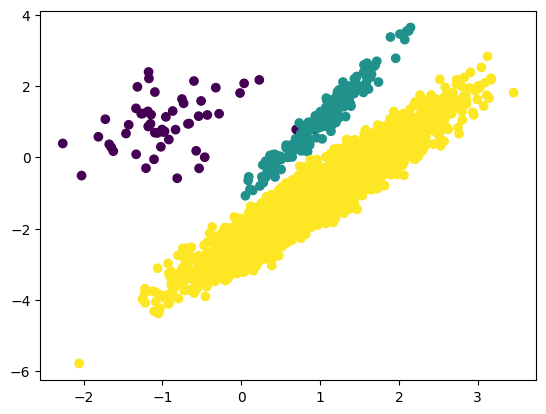

In [82]:
plt.scatter(x_enn[:, 0], x_enn[:, 1], c=y_enn)

### InstanceHardnessThreshold

In [83]:
iht = InstanceHardnessThreshold()

In [84]:
x_iht, y_iht = iht.fit_resample(x, y)

In [85]:
Counter(y_iht)

Counter({0: 64, 1: 80, 2: 3838})

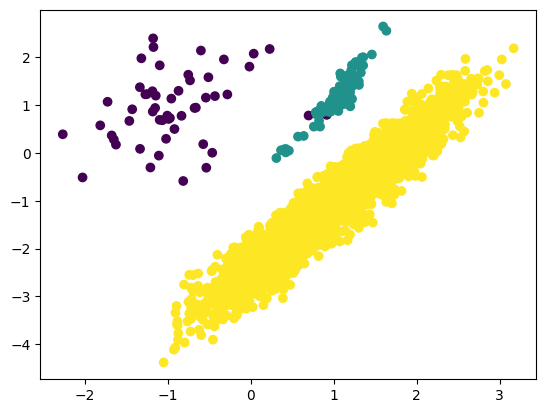

In [86]:
plt.scatter(x_iht[:, 0], x_iht[:, 1], c=y_iht)

### NearMiss

In [87]:
nm = NearMiss()

In [88]:
x_nm, y_nm = nm.fit_resample(x, y)

In [89]:
Counter(y_nm)

Counter({0: 64, 1: 64, 2: 64})

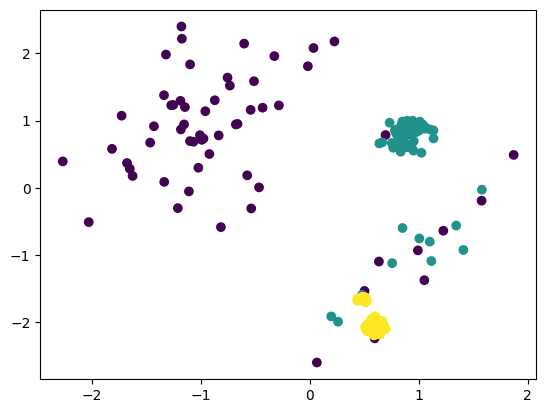

In [90]:
plt.scatter(x_nm[:, 0], x_nm[:, 1], c=y_nm)

### NeighbourhoodCleaningRule

In [91]:
nc = NeighbourhoodCleaningRule()

In [92]:
x_nc, y_nc = nc.fit_resample(x, y)

In [93]:
Counter(y_nc)

Counter({2: 4672, 1: 244, 0: 64})

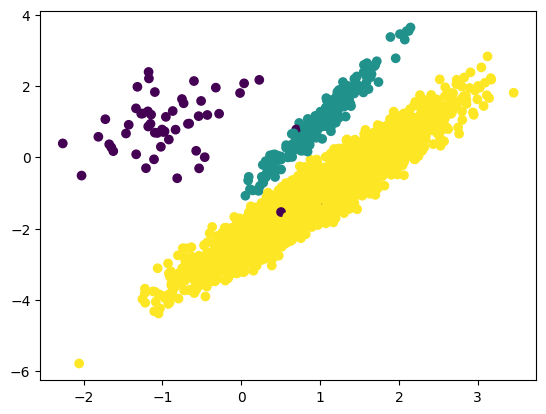

In [94]:
plt.scatter(x_nc[:, 0], x_nc[:, 1], c=y_nc)

### OneSidedSelection

In [96]:
oss = OneSidedSelection()

In [97]:
x_oss, y_oss = oss.fit_resample(x, y)

In [98]:
Counter(y_oss)

Counter({0: 64, 1: 250, 2: 4268})

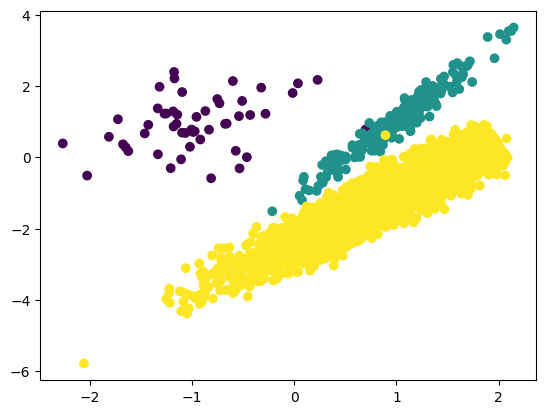

In [99]:
plt.scatter(x_oss[:, 0], x_oss[:, 1], c=y_oss)

### RepeatedEditedNearestNeighbours

In [101]:
renn = RepeatedEditedNearestNeighbours()

In [102]:
x_renn, y_renn = renn.fit_resample(x, y)

In [103]:
Counter(y_renn)

Counter({0: 64, 1: 229, 2: 4572})

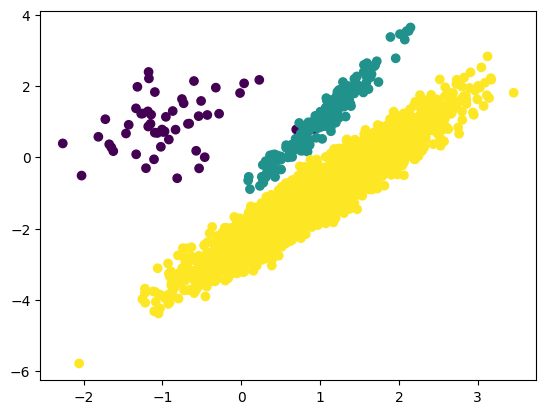

In [104]:
plt.scatter(x_renn[:, 0], x_renn[:, 1], c=y_renn)

### TomekLinks

In [106]:
tl = TomekLinks()

In [107]:
x_tl, y_tl = tl.fit_resample(x, y)

In [108]:
Counter(y_tl)

Counter({2: 4656, 1: 251, 0: 64})

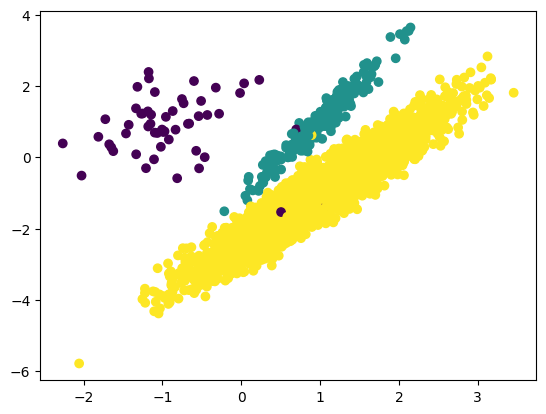

In [109]:
plt.scatter(x_tl[:, 0], x_tl[:, 1], c=y_tl)